# Notebook zu: Mathematik für Informatiker
## Band 2

©2001-2023 Gerald Teschl (http://www.mat.univie.ac.at/~gerald/) und Susanne Teschl (http://staff.technikum-wien.at/~teschl/)

Dieses Notebook ist als Ergänzung zu unserem Buch Mathematik für Informatiker, Band 1, 4. Aufl., Springer 2013, gedacht. Dort finden Sie auch weitere Erklärungen.

In [1]:
%display latex

## Elementare Funktionen

### Nullstellen

Der `solve` Befehl versucht, eine Gleichung nach der angegebenen Variablen aufzulösen. Gleichungen werden mit einem doppelten Gleichheitszeichen eingegeben:

In [2]:
var('x')
solve(x^3 - 7*x^2 + 7*x - 1 ==0,x)

[x == -2*sqrt(2) + 3, x == 2*sqrt(2) + 3, x == 1]

### Faktorisierung

Polynome können mit dem Befehl

In [3]:
factor(x^3-1)

(x^2 + x + 1)*(x - 1)

faktorisiert und mit dem Befehl

In [4]:
expand(_)

x^3 - 1

ausmultipliziert werden. Eine Faktorisierung erfolgt nur, wenn die Nullstellen rationale Zahlen sind.

### Polynomdivision

Um eine Polynomdivision durchzuführen muss Sage das Problem an Maxima weiterreichen:

In [5]:
f(x)=3*x^4 + x^3 - 2*x
g(x)=x^2 + 1
q, r = f.maxima_methods().divide(g)

Der Rückgabe wert ist eine Liste aus Quotient und Rest.

In [6]:
expand(q*g(x)+r)

3*x^4 + x^3 - 2*x

### Interpolationspolynome

Um ein Interpolationspolynom zu erahlten, müssen wir Sage sagen in welchem RIng wir rechnen wollen. Z.B über den Rationalen Zahlen `QQ`. Dann benötigen wir eine Liste der Stützpunkte $(x,f(x))$ und können sie dem Befehl `lagrange_polynomial` übergeben.

In [7]:
f(x) = 1/(1+25*x^2)
pts=[[i/6, f(i/6)] for i in range(-6,7) ]
R=QQ[x]
p(x)= R.lagrange_polynomial(pts)

Unser Beispiel veranschaulicht das Phänom von Runge:

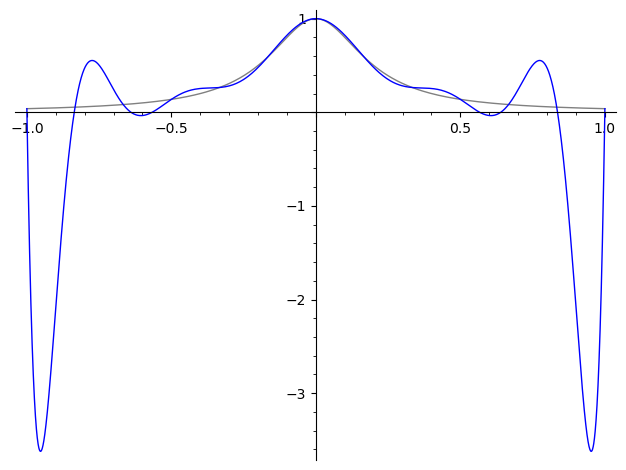

In [8]:
pl=plot(f(x),(-1,1),color='gray')
pl+=plot(p(x),(-1,1))
pl.show()

### Graphische Darstellung von Funktionen

Erinnern Sie sich an den `plot` Befehl, mit dem Funktionen gezeichnet werden können.

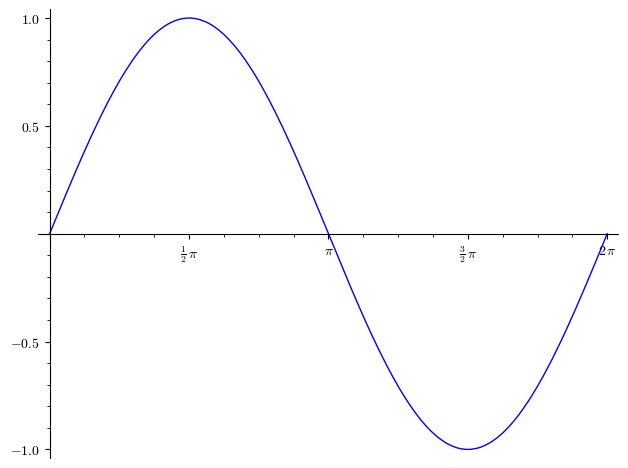

In [9]:
pl = plot(sin(x), (0, 2*pi))
pl.show(ticks=pi/2,tick_formatter=pi)

Mit der Option `ticks` wurde hier festgelegt, dass die x-Achse an Vielfachen von pi/2 zu beschriften ist (die Beschriftung der y-Achse erfolgt hier automatisch). Durch die Optione `tick_formatter` erfolgt die Beschriftung mit $\pi$ anstelle von Fließkommazahlen.

Mehrere Funktionen zeichnt man, indem man die Grafiken zusammenfügt:

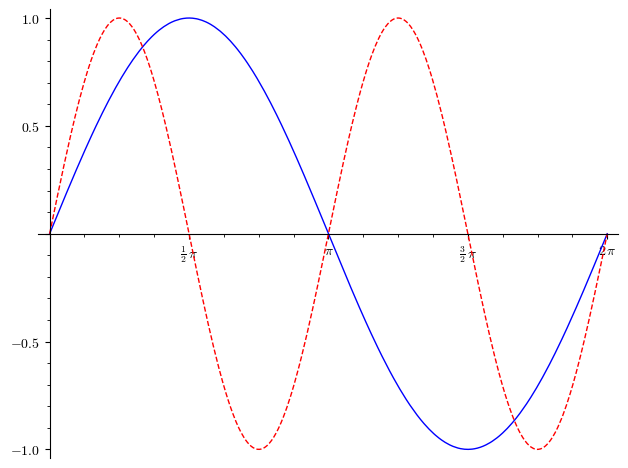

In [10]:
pl=plot(sin(x), (0, 2*pi))
pl+=plot(sin(2*x), (0, 2*pi), linestyle="--", color='red')
pl.show(ticks=pi/2, tick_formatter=pi)

Auch interaktive Grafiken sind möglich:

In [19]:
@interact
def _(a=slider(0,10,default=2), b=slider(0,2*pi)):
    show(plot(sin(x),(x,0,2*pi))+plot(a*sin(x+b),(x,0,2*pi),color='green'),ticks=pi/2,tick_formatter=pi)

Interactive function <function _ at 0x162892c00> with 2 widgets
  a: TransformIntSlider(value=2, description='a', max=10)
  b: TransformFloatSlider(value=0.0, description='b', max=6.283185307179586)

### Bogenmaß und Gradmaß

Winkelwerte werden von Sage defaultmäßig im Bogenmaß interpretiert:

In [11]:
sin(pi/2)

1

Haben Sie den Winkel im Gradmaß gegeben, so muss er mit dem Faktor $\pi/180$  ins Bogenmaß umgerechnet werden:

In [12]:
degree=pi/180
sin(90*degree)

1

## Komplexe Zahlen

### Funktionen mit komplexen Argumenten, Polardarstellung

Natürlich können wir in Sage die trigonometrischen (bzw. alle anderen) Funktionen auch mit komplexem Argument aufrufen (Eingabe der imaginären Einheit mit dem Großbuchstaben "I").

In [13]:
sin(I)

I*sinh(1)

Real- und Imaginärteil werden wie folgt berechnet:

In [14]:
z=exp(2 + I*pi/3)
real(z)+imag(z)

1/2*sqrt(3)*e^2 + 1/2*e^2

In [15]:
[abs(1+I), arg(1+I)]

[sqrt(2), 1/4*pi]

Kompliziertere Ausdrücke müssen vereinfacht werden:

In [16]:
[abs(1+I*sqrt(3)).simplify(), arg(1+I*sqrt(3)).simplify()]

[2, 1/3*pi]

Wurzeln

In [17]:
sqrt(1 + I*sqrt(3)).real().simplify()

1/2*sqrt(3)*sqrt(2)

Logarithmus

In [18]:
log(I).simplify()

1/2*I*pi

## Differentialrechnung I

### Grenzwerte

Grenzwerte erhalten wir wie bei Folgen mit dem Befehl `limit`:

In [19]:
limit((x^2 - 1)/(x - 1), x=1)

2

### Ableitung

Ableitungen werden mit dem Befehl `diff` berechnet :

In [20]:
diff(2*x^3 - 4*x + 1,x)

6*x^2 - 4

Die n-te Ableitung nach x bekommen wir mit `diff(f(x), x, n)`:

In [21]:
diff(2*x^3 - 4*x + 1,x,2)

12*x

### Splines

Eine Splinefunktion erhalten wir mit `spline`:

In [22]:
f(x) = 1/(1+25*x^2)
pts=[[i/6, f(i/6)] for i in range(-6,7) ]
s=spline(pts)

Es ist kein Unterschied zur Originalfunktion erkennbar:

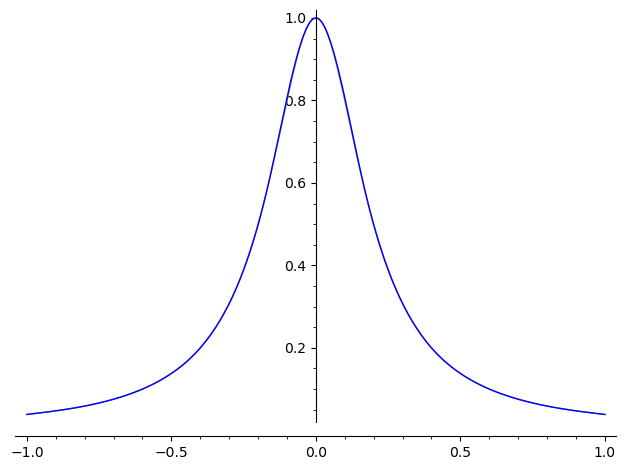

In [23]:
pl=plot(f(x),(-1,1),color='gray')
pl+=plot(s,(-1,1))
pl.show()

## Differentialrechnung II

### Taylorpolynome

Taylorpolynome werden mit dem Befehl `taylor` berechnet. Anzugeben ist dabei das Argument der Funktion (hier x), der Entwicklungspunkt (hier 0), sowie der gewünschte Grad des Polynoms (hier 3):

In [24]:
taylor(sin(x), x, 0, 3)

-1/6*x^3 + x

### Sekantenverfahren

Wir definieren die Funktion, deren Nullstellen wir numerisch mit dem Sekantenverfahren bestimmen möchten:

In [25]:
f(x)= x^3 + 2*x^2 + 10*x - 20
[f(1), f(2)]

[-7, 16]

Nun geben wir die Startwerte vor und lassen uns eine Liste der nächsten Näherungswerte ausgeben:

In [26]:
def zero(n):
    x0=1.
    x1=2.
    for i in range(n):
        x2= x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
        x0, x1 = x1, x2
    return x1

[zero(n) for n in range(1,5) ]

[1.30434782608696, 1.35791230465787, 1.36901332599257, 1.36880745972192]

### Newtonverfahren

Wir geben die Funktion ein, deren Nullstellen wir bestimmen möchten, und geben die rekursive Formel für das Newton-Verfahren ein:

In [27]:
f(x)=x^2-2
fp(x)=diff(f(x),x)
def zero(n):
    x0=1.
    for i in range(n):
        x0= x0 - f(x0)/fp(x0)
    return x0

[zero(n) for n in range(1,5) ]

[1.50000000000000, 1.41666666666667, 1.41421568627451, 1.41421356237469]

Natürlich können Sie auch einfach den Befehl `find_root(f(x), x0, x1)` verwenden, um im Interval von $x_0$ bis $x_1$ einen Näherungswert für eine Nullstelle von $f(x)$ zu finden.

In [28]:
find_root(f(x),1,2)

1.4142135623731364

## Integralrechnung

### Unbestimmtes Integral

Ein unbestimmtes Integral berechnet man mit `integral`

In [29]:
integral(sin(x)+x^2, x)

1/3*x^3 - cos(x)

Sage gibt keine Integrationskonstante aus.

### Bestimmtes Integral

Ein bestimmtes Integral erhalten wir, indem wir die Grenzen ergänzen:

In [30]:
integral(2*exp(x) + x, x, 0, 1)

2*e - 3/2

### Uneigentliches Integral

Analog berechnen wir ein uneigentliches Integral:

In [31]:
integral(x^-3, x, 1, infinity)

1/2

### Gammafunktion

Die Gammafunktion ist eingebaut:

In [32]:
gamma(5)

24

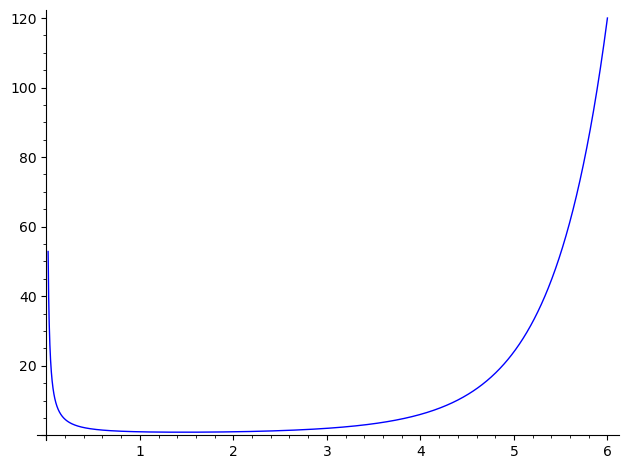

In [33]:
plot(gamma,(0,6)).show()

## Fourierreihen

### Fourierpolynom

Natürlich gibt es auch einen Befehl um ein Fourierpolynom zu berechnen. Die Funktion muss dabei mit dem Befehl `piecewise` definiert werden.

In [34]:
f = piecewise([((-1/2,0), -x), ((0,1/2), x)])
s=f.fourier_series_partial_sum(5)
s

-2/25*cos(10*pi*x)/pi^2 - 2/9*cos(6*pi*x)/pi^2 - 2*cos(2*pi*x)/pi^2 + 1/4

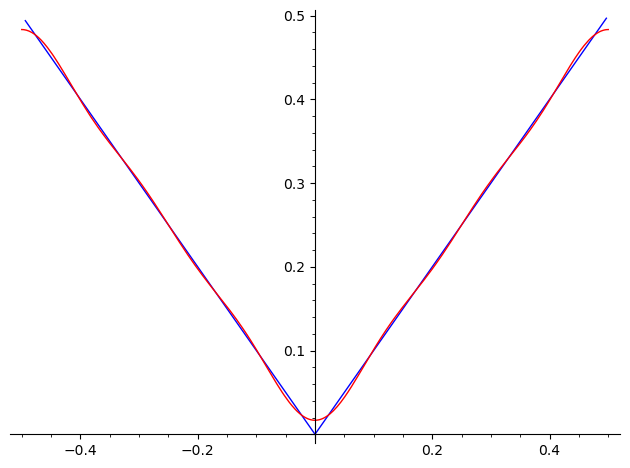

In [35]:
plot(f, (-1/2,1/2)) + plot(s, (-1/2,1/2), color='red')

## Mehrdimensionale Differentialrechnung

### Graphische Darstellung

Zur Veranschaulichung einer reellwertigen Funktion von zwei Variablen kann der Befehl `plot3d` verwendet werden.

In [36]:
var('x y')
plot3d(2-x^2-y^2, (x,-2,2), (y,-2,2),mesh=True).show()

Graphics3d Object

### Partielle Ableitung

Partielle Ableitungen werden mit `diff` berechnet:

In [37]:
var('x y')
diff(x*y^3,x,x)

0

In [38]:
diff(x*y^3,x,y)

3*y^2

### Extrema

Den Gradienten erhalten wir mit

In [39]:
f(x,y)= x*(y-1) + x^3
f.gradient()

(x, y) |--> (3*x^2 + y - 1, x)

und die Hesse-Matrix mit

In [40]:
H=f.hessian()
H(x,y)

[6*x   1]
[  1   0]

Nullstellen des Gradienten

In [41]:
sol=solve(list(f.gradient()),f.args())
sol

[[x == 0, y == 1]]

Einsetzten in

In [42]:
f(x,y).subs(sol)

0

Spur und Determinante der Hessematrix an der Extremstelle:

In [43]:
[H(x,y).subs(sol).trace(), H(x,y).subs(sol).det()]

[0, -1]

## Mehrdimensionale Integralrechnung

### Mehrfachintegrale

Mehrfachintegrale sind als verschachtelte Einfachintegrale einzugeben:

In [44]:
var('x y')
integral(integral(y*sin(x*y),x,0,pi),y,0,pi).simplify_full()

(pi^2 - sin(pi^2))/pi

## Differentialgleichungen

DIfferentialgleichung

In [45]:
t = var('t')    
x = function('x')(t)   
DE = diff(x, t) - 2*sqrt(x)
desolve(DE, [x,t])

sqrt(x(t)) == _C + t

Zweite Ordnung mit Anfangsbedingung

In [46]:
DE = diff(x, t, t) - diff(x, t) + 6*x
desolve(DE, [x,t], ics=[0,1,8])

1/23*(15*sqrt(23)*sin(1/2*sqrt(23)*t) + 23*cos(1/2*sqrt(23)*t))*e^(1/2*t)

## Beschreibende Statistik und Zusammenhangsanalysen

### Stabdiagramm

Ein Stabdiagramm kann wie folgt gezeichnet werden:

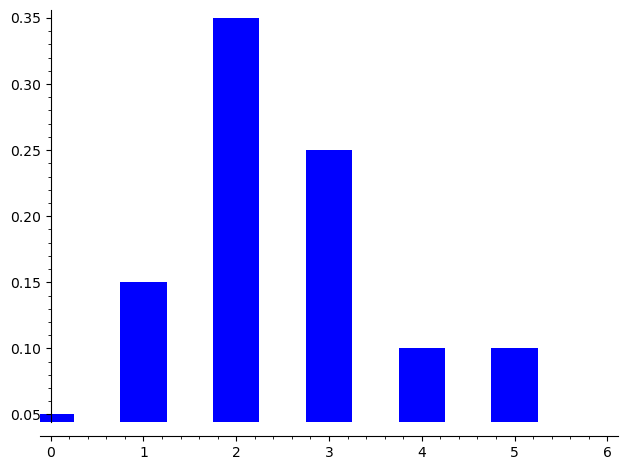

In [47]:
bar_chart([1/20, 3/20, 7/20, 1/4, 1/10, 1/10])

### Histogramm

Ein Histogramm erhalten wir so:

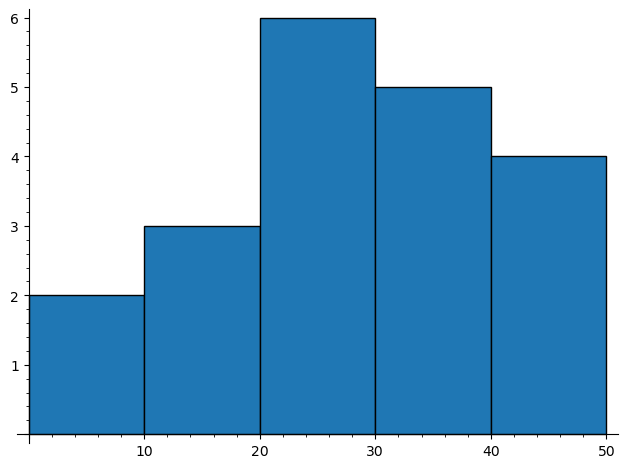

In [48]:
histogram([3, 7, 12, 18, 19, 20, 25, 25, 27, 28, 29, 31, 32, 34, 37, 38, 40, 41, 45, 47],bins=5,range=[0,50])

### Arithmetische Mittel, Median, Varianz, und Standardabeichung

Das arithmetische Mittel kann mit dem Befehl `mean` berechnet werden :

In [49]:
data=[1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4]
mean(data)

30/11

Analog Median

In [50]:
median(data)

3

Varianz

In [51]:
variance(data)

9/11

und Standardabweichung

In [52]:
std(data)

3*sqrt(1/11)

### Regressionsgerade

Der Befehl `find_fit` gibt uns eine Regressionsgerade aus:

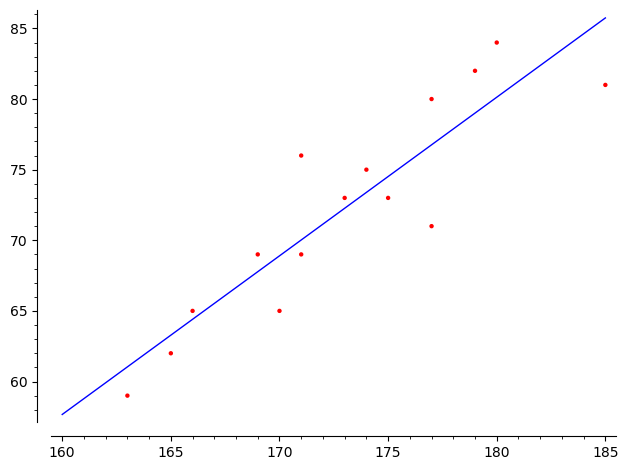

In [53]:
data = [[163, 59], [165, 62], [166, 65], [169, 69], [170, 65], [171, 69], [171, 76], [173, 73], [174, 75], [175, 73] , [177, 80] , [177, 71],  [179, 82], [180, 84], [185, 81]]
var('a,b')
f(x) = a*x + b
fit = find_fit(data,f)
points(data,color='red') + plot(f.subs(fit), (x,160,185))

### R Schnittstelle

Sage kann auch Befehle an [R](https://cran.r-project.org/) weiterreichen. Dazu muss ev. das zugehörige Interface von der Kommandozeile mittels `sage -i rpy2` installiert werden.

In [6]:
data=[1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4]
r.summary(r.c(data))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.727   3.000   4.000

## Elementare Wahrscheinlichkeitsrechnung

### Optimale Stoppstrategie

Die Wahrscheinlichkeiten für die optimale Stoppstrategie können leicht berechnet werden:

In [54]:
var('k')
P(n,j)= (j/n)*sum(1/k,k,j,n-1)
[N(P(12,j),digits=2) for j in range(12)]

[0.00, 0.25, 0.34, 0.38, 0.40, 0.39, 0.37, 0.33, 0.28, 0.23, 0.16, 0.083]

## Zufallsvariablen

### Bereiche markieren

Ein Bereich einer Verteilung kann wie folgt veranschaulicht werden:

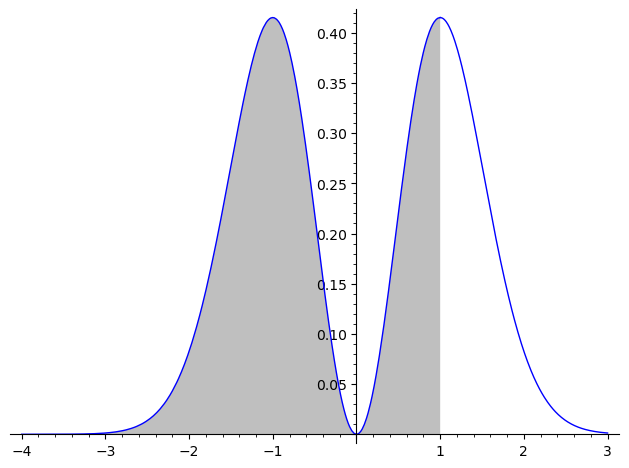

In [55]:
f(x)=2*x^2*exp(-x^2)/sqrt(pi)
plot(f, -4, 1, fill=True) + plot(f, 1, 3)

### Zufallszahlen

Mit dem Befehl

In [56]:
dist = RealDistribution('gaussian', 1)
dist.get_random_element()

0.38281308736043423

kann eine normalverteile ($\sigma=1$) Zufallsvariabel erzeugt werden.

## Spezielle diskrete Verteilungen

Diskrete Verteilungen müssen über ihre Wahrscheinlichkeiten angegeben werden. Z.B. für die Binomailverteilung:

In [37]:
n,p = 10, 0.5
P = [ binomial(n,k)*p^k*(1-p)^(n-k) for k in range(n+1) ]
X = GeneralDiscreteDistribution(P)
X.get_random_element()

6

[[0.01125,
  0.06875,
  0.13499999999999995,
  0.2512500000000001,
  0.0,
  0.3387499999999997,
  0.24125000000000005,
  0.13875000000000004,
  0.05125000000000007,
  0.013749999999999988],
 [1.0,
  1.8,
  2.6,
  3.4000000000000004,
  4.2,
  5.0,
  5.800000000000001,
  6.6000000000000005,
  7.4,
  8.2,
  9.0]]

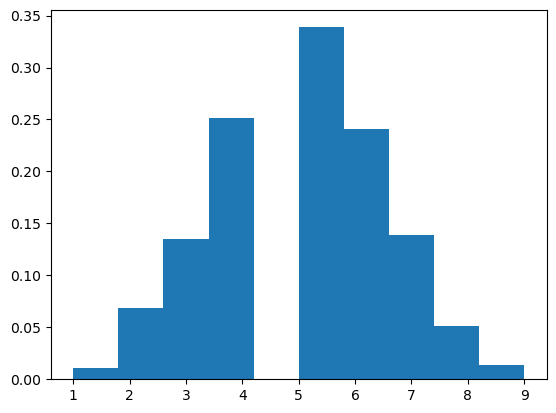

In [36]:
X.generate_histogram_data(num_samples=1000, bins=n)

## Spezielle stetige Verteilungen

### Normalverteilung

Eine Normalverteilung erhalten wir mit

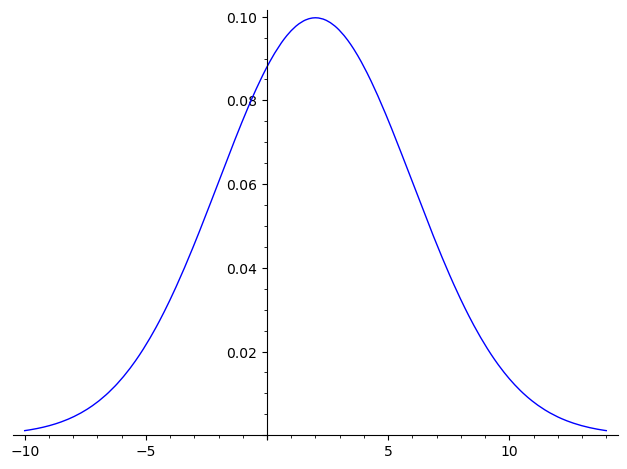

In [15]:
sigma = 4
mu=2
T = RealDistribution('gaussian', sigma)
plot(lambda x: T.distribution_function(x-mu), (mu-3*sigma, mu+3* sigma))

Der Mittelwert $\mu$ kann nicht direkt angegeben werden und muss händisch berücksichtigt werden.

Die Verteilungsfunktion (***c**umulative **d**istibution **f**unction*) $F$ erhalten wir mit

In [17]:
T.cum_distribution_function(6-mu)

0.8413447460685429

und Quantile mit

In [19]:
mu+T.cum_distribution_function_inv(0.05)

-4.5794145078058905

### Prüfverteilungen

Das 0.9-Quantil der Chi-Quadrat-Verteilung mit $m=12$ Freiheitsgraden ist

In [24]:
m=12
T = RealDistribution('chisquared', m)
T.cum_distribution_function_inv(0.9)

18.549347786703244

Das 0.9-Quantil der $t$-Verteilung mit $m=12$ Freiheitsgraden erhalten wir mit

In [25]:
m=12
T = RealDistribution('t', m)
T.cum_distribution_function_inv(0.9)

1.3562173340232055

Das 0.95-Quantil der $F$-Verteilung mit $m_1=2$ und $m_2=12$ Freiheitsgraden
berechnet sich so:

In [26]:
m1, m2= 2,12
T = RealDistribution('F', [m1, m2])
T.cum_distribution_function_inv(0.95)

3.885293834652394

## Statistik

Sage ist nicht sehr gut für Statistik geeignet. Es ist besser man verwendet R (https://cran.r-project.org/).

In [1]:
ttest([1,2,3,4,5],[1,2,3,3.5,5.121])[0]

0.941026372027427